## Import Data

- Github does support uploading files over 100 M, and we cannot really upload gtfs file, so we convert gtfs to gpickle network
- `pip install gtfspy` before running the program
- Windows is not supported
- NetworkX version 1.2.1 (no 2.0+ supported)

In [1]:
import os
import gtfspy
from gtfspy import import_gtfs
from gtfspy import gtfs
from gtfspy import networks
from gtfspy import route_types
import networkx as nx

imported_database_path = 'data/combined.gpickle'
graphs = {}

# check if the data has been processed or not, 
# while as github cannot upload files over 100 M
# we just use gpickle file
if not os.path.exists(imported_database_path):
    print("Importing gtfs zip file")
    import_gfts.import_gfts(['data/gtfs_paris.zip'])
    G = gtfs.GTFS(imported_database_path)
    # generate networks for all travel modes
    graph = networks.stop_to_stop_networks_by_type(G)
    # add all combined network to graph
    graph[4] = networks.combined_stop_to_stop_transit_network(G)
else:   
    for i in range(4):
        graphs[i] = nx.read_gpickle('data/{}.gpickle'.format(i))
    graphs[4] = nx.read_gpickle('data/combined.gpickle')

In [5]:
# print a edge example and node example
print('Node Example:')
print(list(graphs[4].nodes(data=True))[0])
print('Edge Example:')
print(list(graphs[4].edges(data=True))[0])

Node Example:
(1, {'lat': 48.82694828196076, 'name': 'Olympiades', 'lon': 2.367038433387592})
Edge Example:
(1, 3, {'duration_avg': 88.83552631578948, 'route_I_counts': {109: 3040}, 'route_type': 1, 'n_vehicles': 3040, 'd': 738})


## Calculate Centrality

In [7]:
# this process is too slow
import pandas as pd
closeness_file = 'data/closeness.csv'
if not os.path.exists(closeness_file):
    closeness = nx.closeness_centrality(graphs[4], distance='duration_avg')
else:
    # import calculated process instead
    closeness = pd.read_csv(closeness_file)
closeness.head() # sorted by closeness

,Unnamed: 0,node,name,lat,lon,closeness
0,2727,4787,CITE - PALAIS DE JUSTICE,48.855343,2.346108,0.000187
1,2631,4671,RIVOLI - PONT NEUF,48.859783,2.344569,0.000187
2,2726,4786,SAINT-MICHEL - SAINT-GERMAIN,48.852342,2.343778,0.000185
3,4506,7395,LILLE - UNIVERSITE,48.859657,2.321809,0.000185
4,3642,6251,PONT SULLY - QUAI DE BETHUNE,48.850120,2.359398,0.000185


## Centrality vs. Traffic

In [9]:
# import traffic data
# this has already been consolidated with closeness file
traffic = pd.read_csv('data/traffic.csv')
traffic.head()

,Unnamed: 0,node,name,lat,lon,closeness,Station,Trafic
0,0,1,OLYMPIADES,48.826948,2.367038,0.000001,OLYMPIADES,7103304
1,1,7440,OLYMPIADES,48.827029,2.367352,0.000161,OLYMPIADES,7103304
2,2,7480,OLYMPIADES,48.827128,2.366644,0.000164,OLYMPIADES,7103304
3,3,5,COUR SAINT-EMILION,48.833314,2.387300,0.000002,COUR SAINT-EMILION,5859214
4,4,7,BERCY,48.840543,2.379409,0.000002,BERCY,5544847


<IPython.core.display.Javascript object>


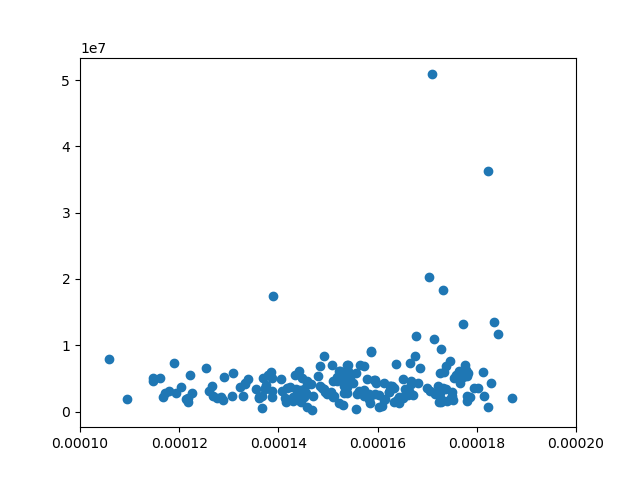

In [21]:
from matplotlib import pyplot as plt
%matplotlib notebook
traffic = traffic.sort_values(by='closeness', ascending=False)
traffic.drop_duplicates(subset='Station', inplace=True)
plt.scatter(traffic.closeness, traffic.Trafic, marker='o')
plt.xlim((1e-4,2e-4))
plt.show()